In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier as XGBC
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
from sklearn.model_selection import GridSearchCV

# 2-classes

In [72]:
Xtrain, Ytrain, Xtest, Ytest = joblib.load('/home/yfy/Desktop/projects/NII_image_classify/new_bof_xy.pkl')

In [73]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)

In [88]:
clf = XGBC(n_estimators=81 #27
           ,random_state=420
           ,use_label_encoder=False
           ,eval_metric='logloss'
           ,max_depth=3  #5
           ,objective='binary:logistic'
#            ,num_class=2
           ,tree_method='gpu_hist'
           ,learning_rate=0.175
           ,gamma = 22
           ,subsample = 0.76
           ,colsample_bytree=1
           ,min_child_weight=1
           ,colsample_bylevel=0.54
           ,reg_alpha=0
           ,reg_lambda=0.35
          )


# clf.fit(Xtrain,Ytrain,eval_set=[(Xtest,Ytest)])
clf.fit(Xtrain,Ytrain)
print('cross validation on training set: ',CVS(clf,Xtrain,Ytrain,cv=5).mean())
print('test score: ',clf.score(Xtest,Ytest))

cross validation on training set:  0.7642857142857142
test score:  0.8192307692307692


In [89]:
clf.predict(Xtest)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

## predict接口

In [90]:
from sklearn.metrics import accuracy_score as acc

In [91]:
score = cm(Ytest,clf.predict(Xtest))

In [92]:
score

array([[217,  43],
       [ 51, 209]])

In [99]:
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(Ytest,clf.predict_proba(Xtest)[:,1])

In [100]:
area = auc(Ytest,clf.predict_proba(Xtest)[:,1])

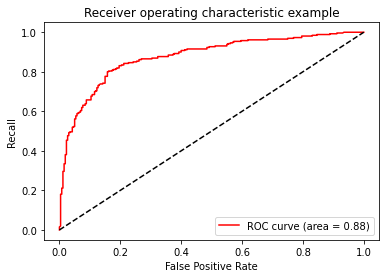

In [101]:
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black',linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## tuning

In [118]:
clf = XGBC(n_estimators=73
         ,random_state=420
         ,use_label_encoder=False
         ,eval_metric='auc'
         ,max_depth=3
         ,objective='multi:softmax'
         ,num_class=2
         ,tree_method='gpu_hist'
         ,subsample=0.7653061224489796
         ,learning_rate=0.017368421052631578
         ,gamma = 7
         ,colsample_bytree=1
         ,min_child_weight=0
         ,colsample_bylevel=1  #0.54
#          ,reg_alpha=0
#          ,reg_lambda=0.35
          )

clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.8096153846153846

73 0.7964285714285714


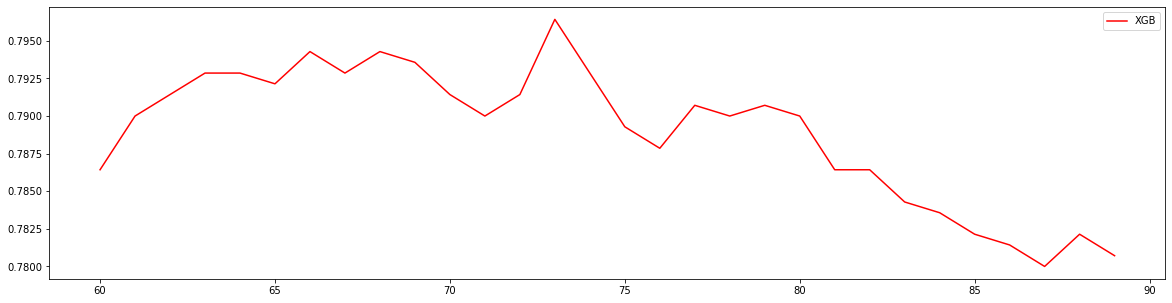

In [84]:
axisx = np.arange(60,90,1)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=i
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='auc'
               ,max_depth=3
#              ,objective='multi:softmax'
#              ,num_class=2
#                ,tree_method='gpu_hist'
#                ,learning_rate=0.175
#                ,gamma = 22
#                ,subsample=0.76
#                ,colsample_bytree=1
#                ,min_child_weight=1
#                ,colsample_bylevel=0.54
#                ,reg_alpha=0
#                ,reg_lambda=0.35
              )
#     clf = clf.fit(Xtrain,Ytrain)
#     rs.append(clf.score(Xtest,Ytest))
    rs.append(CVS(clf,Xtrain,Ytrain,cv=5).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()
# 73

0.7653061224489796 0.8


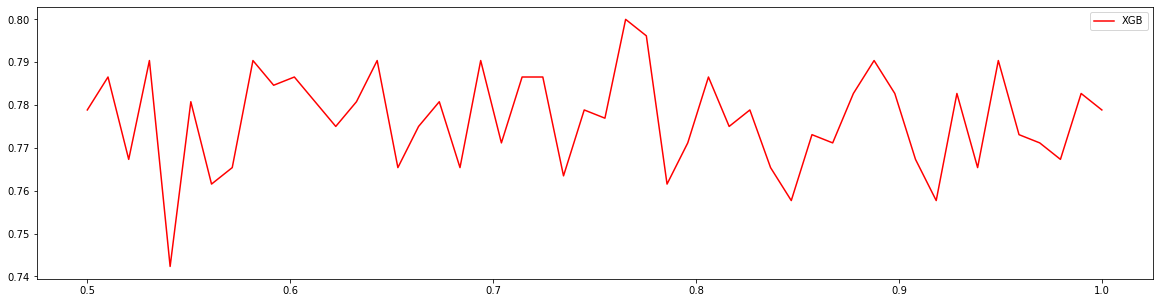

In [102]:
axisx = np.linspace(0.5,1,50)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=73 #27
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='auc'
               ,max_depth=3  #5
#              ,objective='multi:softmax'
#              ,num_class=2
               ,tree_method='gpu_hist'
#                ,learning_rate=0.175
#                ,gamma = 22
               ,subsample=i
#                ,colsample_bytree=1
#                ,min_child_weight=1
#                ,colsample_bylevel=0.54
#                ,reg_alpha=0
#                ,reg_lambda=0.35
              )
    clf = clf.fit(Xtrain,Ytrain)
    rs.append(clf.score(Xtest,Ytest))
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()
# 保留0.7653061224489796

0.017368421052631578 0.8211538461538461


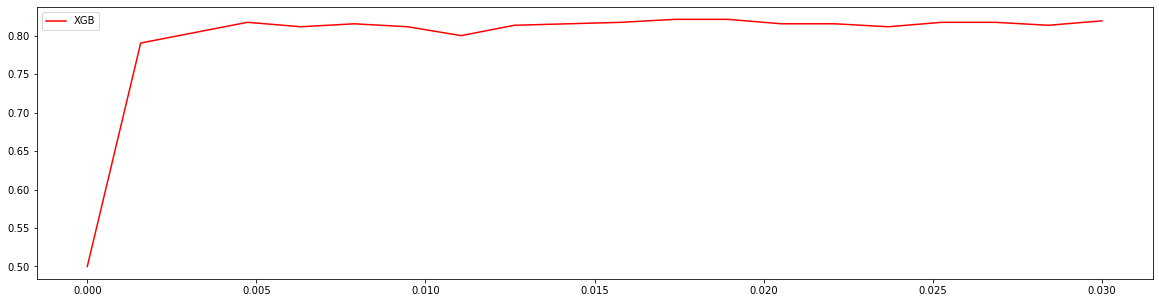

In [106]:
axisx = np.linspace(0,0.03,20)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=73 #27
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='auc'
               ,max_depth=3  #5
#              ,objective='multi:softmax'
#              ,num_class=2
               ,tree_method='gpu_hist'
               ,learning_rate=i
#                ,gamma = 22
               ,subsample=0.7653061224489796
#                ,colsample_bytree=1
#                ,min_child_weight=1
#                ,colsample_bylevel=0.54
#                ,reg_alpha=0
#                ,reg_lambda=0.35
              )
    clf = clf.fit(Xtrain,Ytrain)
    rs.append(clf.score(Xtest,Ytest))
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

7 0.825


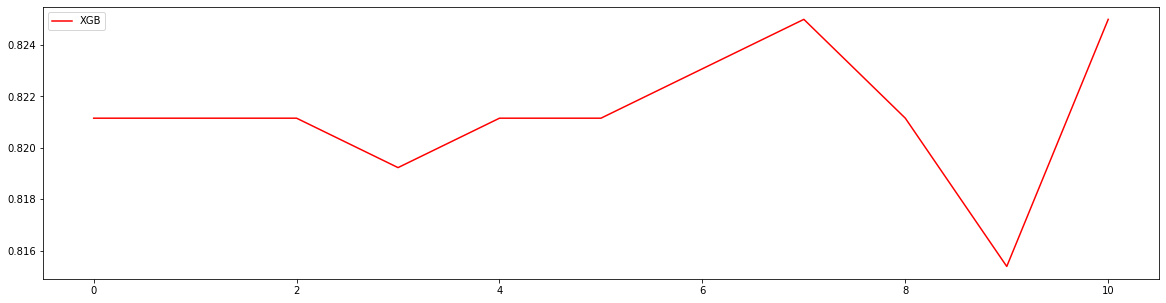

In [110]:
axisx = np.arange(0,11,1)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=73 #27
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='auc'
               ,max_depth=3  #5
#              ,objective='multi:softmax'
#              ,num_class=2
               ,tree_method='gpu_hist'
               ,learning_rate=0.017368421052631578
               ,gamma = i
               ,subsample=0.7653061224489796
#                ,colsample_bytree=1
#                ,min_child_weight=1
#                ,colsample_bylevel=0.54
#                ,reg_alpha=0
#                ,reg_lambda=0.35
              )
    clf = clf.fit(Xtrain,Ytrain)
    rs.append(clf.score(Xtest,Ytest))
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

1.0 0.825


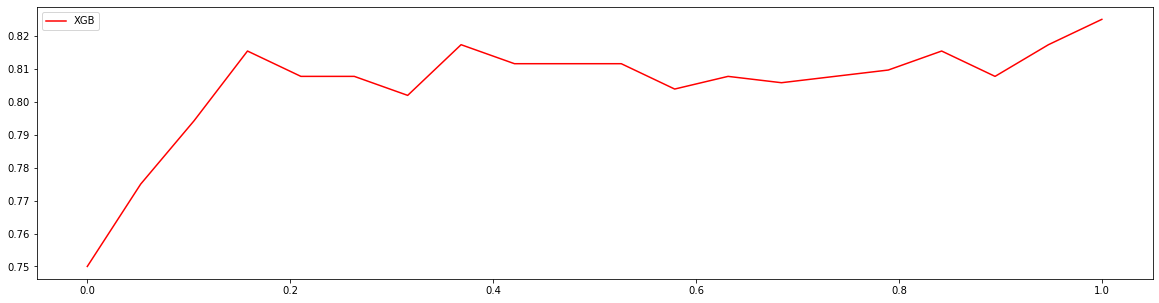

In [117]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    clf = XGBC(n_estimators=73 #27
               ,random_state=420
               ,use_label_encoder=False
               ,eval_metric='auc'
               ,max_depth=3  #5
#              ,objective='multi:softmax'
#              ,num_class=2
               ,tree_method='gpu_hist'
               ,learning_rate=0.017368421052631578
               ,gamma = 7
               ,subsample=0.7653061224489796
               ,colsample_bytree=1
#                ,min_child_weight=1
               ,colsample_bylevel=i
#                ,reg_alpha=0
#                ,reg_lambda=0.35
              )
    clf = clf.fit(Xtrain,Ytrain)
    rs.append(clf.score(Xtest,Ytest))
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

## grid search

In [5]:
from sklearn.model_selection import GridSearchCV

# param = {'max_depth':np.arange(1,8,1), 'learning_rate':np.arange(0.05,1,0.05)}
param = {'gamma':np.arange(1,40,1)}

gscv = GridSearchCV(clf,param_grid = param,scoring='accuracy',cv=5)

In [6]:
gscv.fit(Xtrain,Ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=0, gpu_id=0,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.3, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_esti...
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=420, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                              

In [7]:
gscv.best_params_

{'gamma': 3}

In [8]:
gscv.best_score_

0.7814285714285714

# 4-classes

In [3]:
Xtrain, Ytrain, Xval, Yval = joblib.load('/home/yfy/Desktop/projects/NII_image_classify/Multi_classification/4c_new_bof_xy.pkl')

In [4]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xval = np.array(Xval)
Yval = np.array(Yval)

In [5]:
Xtrain.shape

(2800, 200)

In [6]:
Ytrain.shape

(2800,)

In [7]:
Xval.shape

(1040, 200)

In [8]:
Yval.shape

(1040,)

In [11]:
clf = XGBC(n_estimators=200 #27
           ,random_state=420
           ,use_label_encoder=False
           ,eval_metric='auc'
           ,max_depth=6  #5
           ,objective='multi:softmax'
           ,num_class=4
           ,tree_method='gpu_hist'
          )


clf.fit(Xtrain,Ytrain,eval_set=[(Xval,Yval)])
# clf.fit(Xtrain,Ytrain)
clf.score(Xval,Yval)

[10:59:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[0]	validation_0-auc:nan
[10:59:50] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[1]	validation_0-auc:nan
[10:59:51] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[2]	validation_0-auc:nan
[10:59:51] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[3]	validation_0-auc:nan
[10:59:51] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[4]	validation_0-auc:nan
[10:59:51] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[5]	validation_0-auc:nan
[10:59:51] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[6]	validation_0-auc:nan
[10:59:51] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[7]	validation_0-auc:nan
[10:59:51] WARNI

[10:59:57] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[67]	validation_0-auc:nan
[10:59:57] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[68]	validation_0-auc:nan
[10:59:57] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[69]	validation_0-auc:nan
[10:59:57] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[70]	validation_0-auc:nan
[10:59:57] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[71]	validation_0-auc:nan
[10:59:58] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[72]	validation_0-auc:nan
[10:59:58] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[73]	validation_0-auc:nan
[10:59:58] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[74]	validation_0-auc:nan
[10:59:5

[11:00:01] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[133]	validation_0-auc:nan
[11:00:01] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[134]	validation_0-auc:nan
[11:00:01] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[135]	validation_0-auc:nan
[11:00:01] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[136]	validation_0-auc:nan
[11:00:01] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[137]	validation_0-auc:nan
[11:00:02] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[138]	validation_0-auc:nan
[11:00:02] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[139]	validation_0-auc:nan
[11:00:02] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[140]	validation_0-auc:nan


[11:00:05] WARNING: ../src/metric/auc.cc:307: Dataset contains only positive or negative samples.
[199]	validation_0-auc:nan


0.7788461538461539